In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import ipynb.fs.full.visuals as vs
from IPython.display import display

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('/Users/boston_housing/housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


In [3]:
prices_arr = np.array(prices)

# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


Question 1 - Feature Observation

I would expect the 'RM' value to increase with the value of the home. If two homes were compared in the same neighborhood, with other variables controlled (proximity to school, no ghosts in the house (joking), etc..) I would guess that a house with more rooms would increase the value. That said, square footage would have to be taken into consideration as you could increase the number of rooms without increasing square footage and decieve the buying to a certain degree.

For the LSTAT statistic I would expect a higher value would decrease the value of homes in the neighborhood in comparison to a neighborhood with white collar workers. In general a lower class working individual will not be able to secure a large mortgage, and this would control the price of houses in this neighborhood.

I higher PTRATIO could imply higher home value do to the wealthy's ability to choose schools. Lower class individuals usually do not have the luxury of choosing schools and have to default to public schools. Someone owning a home of a higher value may have the ability to choose a private school, or pays higher taxes with the understanding that their public school will have smaller class sizes. Generally smaller class sizes are considered better as they give students more one on one attention, and that is generally considered favorable.

In [4]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score

score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))


Model has a coefficient of determination, R^2, of 0.923.


Question 2

I would say this model has captured variation of the target variable as the R^2 score is very close to the score of 1. 

In [5]:
from sklearn.cross_validation import train_test_split

X = np.array(features[['RM', 'LSTAT', 'PTRATIO']])
y = np.array(data[['MEDV']])

X_train, X_test, y_train, y_test = train_test_split(features, prices, train_size=0.8, random_state=42)

print("Training and testing split was successful.")

Training and testing split was successful.


Question 3

The benefit to breaking up the data into subsets is that it allows to prevent an overfitting or underfitting scenario. For example training the model based on a set of data there may be a tendency to create a model that fits the data perfectly by using more complex polynomials. This is similar to memorizing test answers instead of studying the underlying rules. If the test has answers that are different then what you studied you may not be able to answer as you never learned the underlying mechanism. Alternatively, underfitting is like coming to the test an winging it. The model oversimplifies the data like a regression line with a low or negative R^2 score.

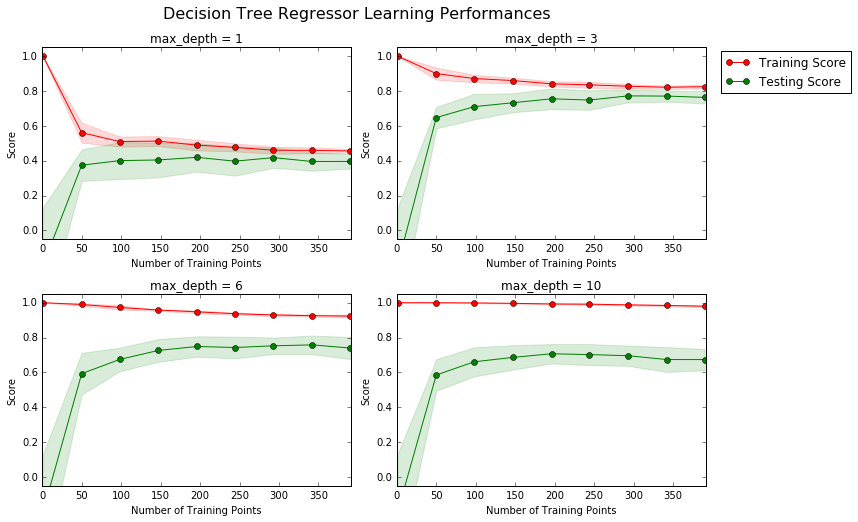

In [6]:
vs.ModelLearning(features, prices)

Question 4

In graph 4 (bottom right) the max depth was 10. In this particular graph the as more training points are added the training data error increases significantly. The testing curve remains at a high level of training error. In this graph's case, more points do not appear to further validate what is going on. It is appears that the data will not converge and shows high variance.

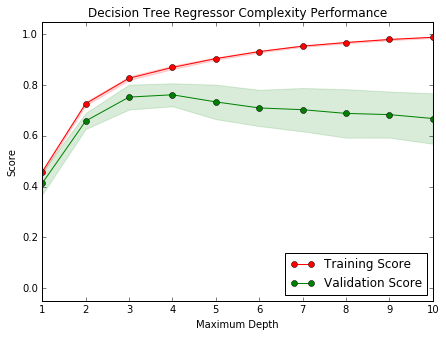

In [7]:
vs.ModelComplexity(X_train, y_train)

Question 5:

When the model is at a depth of 1 it is high bias as opposed to high variance. That said its bias is lower in comparison to other depths, so the bias is a relative question.

When the graph has a depth of 10 it suffers from high variance. This is because the training and testing data do not converge. Depth 10 did not do well in the cross validation score, and that is characteristic of high variance. The training data did do good with a small number of training examples, but suffered after the training examples increased. 

Question 6:

I believe the model with depth of 1 performs the best in this case. This is the because the training and test error coverge at a lower score than any other case. It does get better with depth up until about 300 training examples at which it doesn't look like there is any more benefit to be gained.

Question 7:

The grid search technique is used to decide the best kernel and C parameters to use while using Support Vector Machine method. You simply create a grid that encompasses all the possible kernel/C combinations, calculate the F1 scores and then choose the highest F1 score. 

Question 8:

Cross validation is used to help make a decision of the best method parameters to use using a learning curve. You can't use testing data to make decisions about the type of model you want to use, so you use a cross validation set which is a third group of data that has been segregated for use. However, the trade is that you lose some good data that can be used to train your model. This is where k-folds CV comes into play. K is a variable referring to the number of buckets the data will be broken down into, to be trained K times. The testing set will be a different bucket of testing data that is randomly selected. The results are averaged to get a final model. The randomization of the testing data can help alleviate any bias that could come into the model.

In [8]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    cv_sets = ShuffleSplit(X.shape[0], n_iter=10, test_size=0.20, random_state=0)
    regressor = DecisionTreeRegressor(random_state=0)
    params = {'max_depth': (1,2,3,4,5,6,7,8,9,10)}
    scoring_fnc = make_scorer(performance_metric)
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)
    grid = grid.fit(X, y)
    return grid.best_estimator_

In [9]:
reg = fit_model(X_train, y_train)

print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


In [10]:
#Question 10

# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


Question 10

As predicted client #3 has the most expensive home at $930k. This is due #3 having 8 rooms in an area with 3 percent poverty and a high teach to student ratio. Client #1 has a decent student to teacher ratio, but much higher poverty level, and less rooms making the prediction less than half of #3's predicted price. Finally, #2 has the highest poverty level of the 3, the worst teacher to student ration, and the least amount of bed rooms, making it the lowest asking price.

In [11]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


Question 11

In general data collected from 1978 will be relevant to today's housing market considering you adjust for inflation. People still desire to buy homes in nice neighborhoods with as many rooms as possible (maximize size vs. price). That said their have been flucuations in the market due to introduction of various credit schemes like what happened pre-2008 crash. Easy credit artificially inflated the price of houses and ultimatley led to the crash of the housing market. The value of your home in 2007 vs. 2009 was probably significantly different. Perhaps an adjustment for market data along with inflation would be helpful.

Other factors that could come into play in determining house price would be the size of the garage (if applicable), square footage of the backyard, local taxes, some measure of school performance, vincity to a whole foods vs. a cracker barrel, voting preferences, state, city, sexual orientation of population, culture of area etc..

For the Boston area I believe the model is robust enough to make predictions as long as it is used locally and not extrapolated to other cities.

Data from Boston could not be compared with rural areas. A city like Boston will often times have inflated housing prices due to higher demand and access to higher paying jobs. New York City is notorious for having elevated price vs. living in rural areas. Also a city is more likely to introduce a policy such as rent control which can effect market prices by possibly elevating them. The amount of house you can get in the suburbs of Dallas vs. Boston varies greatly. 

It is fair to judge the price of a home off of the neighborhood, because these are factors that are taken into consideration when people buy homes. One could make the argument that people that are interested in buying homes in more depressed areas ultimately elevate the price in a worse neighborhood, aka gentrification. This phenonmenom would be hard to quantify as areas like Harlem probably are worse statistically, but show higher housing prices. Brooklyn would be another example of an area that was depressed very recently and experienced a spike in demand thus elevating hosuing prices.
